# Post-workshop exercise
For this exercise we use the 'health, lifestyle, health care use and supply, causes of death; from 1900' dataset from CBS opendata. You can get a visual overview of the data [here]( https://opendata.cbs.nl/statline/#/CBS/en/dataset/37852eng/table?ts=1671446345991). For this exercise please use [this file](https://raw.githubusercontent.com/esciencecenter-digital-skills/2023-01-25-ds-python-rivm/data/Health__lifestyle__health_care_use_and_supply__causes_of_death__from_1900_21122022_143458.csv), right-click and click 'save as' to download it to your computer. 

Imagine you have the task to explore the dataset and present your findings to your colleagues in a jupyter notebook. So make the graphs as readable as possible, and put some clarifying documentation in markdown cells around your code.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as p9

### 1. Loading the data
1. Load the data in pandas. (Hint: check the separator that is used in the file, you can pass a different separator to `read_csv()` using the `sep` argument)
2. Take a look at the data. As you can see, the Topic is read as a column and not as index. You can fix this by passing `index_col='Topic'` to `read_csv()`.

In [15]:
filepath = '../data/Health__lifestyle__health_care_use_and_supply__causes_of_death__from_1900_21122022_143458.csv'
df = pd.read_csv(filepath, sep=';', index_col='Topic')
df.head()

,Unnamed: 1,1900,1940,1980,1990,2000,2010,2019,2020,2021,2022
Topic,,,,,,,,,,,
Demographic key figures|Population on January 1,x 1 000,5104,8834,14091,14893,15864,16575,17282,17408,17475,17591
Demographic key figures|Live born children,x 1 000,163,185,181,198,207,184,170,169,179,.
Demographic key figures|Deaths,x 1 000,92,88,114,129,141,136,152,169,171,.
Health status|Persons in (very) good health,%,.,.,.,81.7,80.4,80.3,78.7,81.5,80.5,.
Health status|Persons with complete dentures,%,.,.,.,23.7,15.7,.,.,.,.,.


### 2. Cleaning up the data
1. Take a look at the data. How are missing data represented?
2. Replace the value that is used for missing data with NaN. (hint: You can replace values using DataFrame.replace(). You can use numpy.nan to represent NaN values)
3. Rename the 'Unnamed: 1' column to 'unit'
4. What is the datatype of the numerical values?
5. Convert all data in the numerical columns (all columns excluding 'unit') to the 'float' datatype. Use a for-loop to loop over all the numerical columns. Change for a specific column inside the body of the for-loop.

In [16]:
# Missing data are represented as dots, to replace:
df = df.replace('.', np.nan)

In [17]:
df = df.rename(columns={'Unnamed: 1': 'unit'})

In [18]:
# Data types
df.dtypes

unit    object
1900    object
1940    object
1980    object
1990    object
2000    object
2010    object
2019    object
2020    object
2021    object
2022    object
dtype: object

In [19]:
# Convert data types for numerical columns to float
for column in ['1900', '1940', '1980', '1990', '2000', '2010', '2019', '2020', '2021', '2022']:
 df[column] = df[column].astype('float')

## 3. Getting an overview of the data
The dataset is quite large, or at least there are a lot of different topics in there. The topics are organized in a nested way, for example: 'Use of health care services|Contacts with health professionals|Dentist' consists of 3 levels: 'Use of health care services' (level 1) 'Contacts with health professionals' (level 2) 'Dentist' (level 3). We will write some functions to create a better overview of the dataset and get quicker access to the different topics of our interest.
1. First figure out how to get the level 1 topic from a full topic description. Create a new variable called topic: `topic = 'level 1| level 2 | level 3'`. Use the [`str.split`](https://www.w3schools.com/python/ref_string_split.asp) function and list indexing to get just the level 1 part of the string.
2. Create a function that returns a list with just the seven level 1 topics in the dataset. Hint 1: use your answer from the previous question. Hint 2: You can loop over the topics in the dataframe by doing `for topic in df.index:`.
3. Look at the code below. What does it do? Try it out! Copy these functions to your notebook, it will be very handy for the next questions!

```python
def subset_data_starting_with(df, pattern):
    mask = df.index.str.startswith(pattern)
    subset = df.iloc[mask].copy()
    return subset

def rename_to_level_3(df):
    mapper = dict()
    for topic in df.index:
        mapper[topic] = topic.split('|')[2]
    df = df.rename(index=mapper)
    return df
```

In [21]:
topic = 'level 1| level 2 | level 3'
topic.split('|')[0]

'level 1'

In [20]:
def get_level_1_topics(df):
    level_1_topics = list()
    for topic in df.index:
        level_1_topic = topic.split('|')[0]
        if level_1_topic not in level_1_topics:
            level_1_topics.append(level_1_topic)
    return level_1_topics
get_level_1_topics(df)

['Demographic key figures',
 'Health status',
 'Lifestyle',
 'Use of health care services',
 'Care supply',
 'Birth and life expectancy',
 'Causes of death']

In [36]:
def subset_data_starting_with(df, pattern):
    mask = df.index.str.startswith(pattern)
    subset = df.iloc[mask].copy()
    return subset

def rename_to_level_3(df):
    mapper = dict()
    for topic in df.index:
        mapper[topic] = topic.split('|')[2]
    df = df.rename(index=mapper)
    return df

In [41]:
# Takes a subset of the data with topics starting with the pattern
subset = subset_data_starting_with(df, 'Use of health care services|Contacts with health professionals')
subset

,unit,1900,1940,1980,1990,2000,2010,2019,2020,2021,2022
Topic,,,,,,,,,,,
Use of health care services|Contacts with health professionals|General practitioner (GP),%,NaN,NaN,NaN,75.4,75.6,72.3,68.7,64.8,62.1,NaN
Use of health care services|Contacts with health professionals|Medical specialist,%,NaN,NaN,NaN,41.0,38.0,37.8,39.9,36.4,37.2,NaN
Use of health care services|Contacts with health professionals|Dentist,%,NaN,NaN,NaN,71.3,78.2,78.4,80.4,78.8,79.2,NaN
Use of health care services|Contacts with health professionals|Physiotherapist or exercise therapist,%,NaN,NaN,NaN,14.3,16.2,22.0,26.5,25.7,25.4,NaN
Use of health care services|Contacts with health professionals|Alternative healer,%,NaN,NaN,NaN,5.9,5.9,5.8,4.3,5.2,5.1,NaN


In [42]:
# Renames the topic to just the level 3 part of the topic
subset = rename_to_level_3(subset)
subset

,unit,1900,1940,1980,1990,2000,2010,2019,2020,2021,2022
Topic,,,,,,,,,,,
General practitioner (GP),%,NaN,NaN,NaN,75.4,75.6,72.3,68.7,64.8,62.1,NaN
Medical specialist,%,NaN,NaN,NaN,41.0,38.0,37.8,39.9,36.4,37.2,NaN
Dentist,%,NaN,NaN,NaN,71.3,78.2,78.4,80.4,78.8,79.2,NaN
Physiotherapist or exercise therapist,%,NaN,NaN,NaN,14.3,16.2,22.0,26.5,25.7,25.4,NaN
Alternative healer,%,NaN,NaN,NaN,5.9,5.9,5.8,4.3,5.2,5.1,NaN


## 4. Contacts with health professionals bar graph
We will look at the 'Use of health care services|Contacts with health professionals' data. We want to get a visual overview of how many people have contact with health professionals. But first, it's good to note that this is an aggregated dataset. Each value in the table actually comes from aggregating data of a lot of individuals. This is different from the dataset used in the course where every row corresponded with a single captured animal, and we had to aggregate it to plot.
1. Create a bargraph that shows the percentage of people having contact with a health professional for each category (General practitioner (GP), Medical specialist, Dentist, Physiotherapist or exercise therapist, and Alternative healer) in 2021. Hint 1: Use the functions we defined in the previous exercise to select the data. Hint 2: The topics are not in a column but in the index. You can select the topics with df.index. Hint 3: plotnine by wants to plot the count of values you pass it. Since our data is already aggregated we want to plot the actual values. You can do that by passing `stat='identity'` to the `geom_bar` function.
2. 

In [52]:
# Select a subset of the data and rename
health_contacts_df = subset_data_starting_with(df, 'Use of health care services|Contacts with health professionals')
health_contacts_df = rename_to_level_3(health_contacts_df)

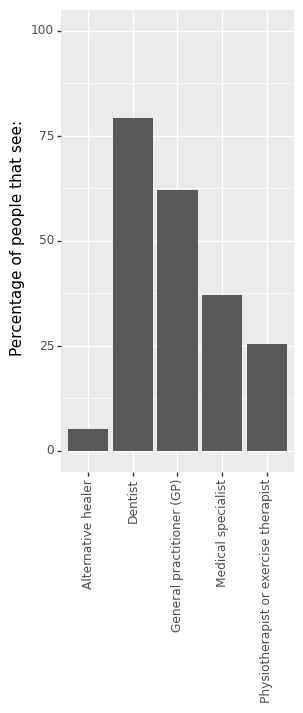

<ggplot: (678044763)>

In [53]:
(p9.ggplot(data=health_contacts_df,
           mapping=p9.aes(x=health_contacts_df.index, y='2021'))
    + p9.geom_bar(stat='identity')
    + p9.theme(axis_text_x=p9.element_text(angle=90))
    + p9.ylab("Percentage of people that see:")
    + p9.ylim([0,100])
    + p9.theme(figure_size=(3, 6))
)

In [131]:
transposed_df = health_contacts_df.transpose()
transposed_df = transposed_df.drop('unit')
transposed_df['year'] = transposed_df.index.astype(int)
long_df = pd.melt(transposed_df, id_vars='year')
long_df['value'] = long_df['value'].astype(float)
long_df.head()

,year,Topic,value
0,1900,General practitioner (GP),NaN
1,1940,General practitioner (GP),NaN
2,1980,General practitioner (GP),NaN
3,1990,General practitioner (GP),75.4
4,2000,General practitioner (GP),75.6


/Users/svenvanderburg/miniforge3/envs/teaching/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 4 rows containing missing values.


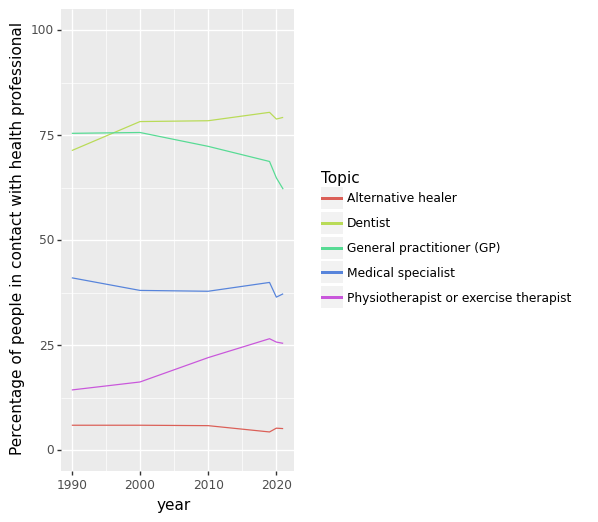

<ggplot: (707582745)>

In [133]:
(p9.ggplot(data=long_df,
           mapping=p9.aes(x='year', y='value', color='Topic'))
    + p9.geom_line()
    + p9.theme(figure_size=(3, 6))
    + p9.xlim([1990, 2021])
    + p9.ylim([0,100])
    + p9.ylab('Percentage of people in contact with health professional')
)

Other questions:
* Write a function that only keeps the last part of the index names (i.e. splitting on '|')
* Hypothesis: Proportion of HIV-infected people that develop AIDS has declined over the years.
* Population, live born children, deaths over the years (including 2022). Missing data!
* Expenditure. See if mortality / persons in (very) good health correlate to healthcare costs. Costs as a percentage of the GDP. Life expectancy
* Merge with some other data